In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Data Importing
df = pd.read_csv("final.csv")

df.head()

,a,b,c,d,e,f,g,h,i,j,...,t,u,v,w,x,y,z,aa,ab,ac
0,1.0,1.568754,0.634973,0.169649,0.411030,0.556044,1.282684,2.168578,0.673727,0.000000,...,-1.034827,-0.804889,0.000000,0.862969,0.976780,0.989285,1.104250,0.517633,0.899814,1.019106
1,0.0,0.776691,-1.313938,0.611319,0.966526,-0.596647,1.170007,1.035755,-1.454625,2.173076,...,-1.274680,-0.031339,0.000000,0.903419,1.870679,1.062947,2.021606,2.122723,1.908154,1.568488
2,1.0,0.738625,-0.978893,0.414343,0.298139,-1.409658,0.489915,-2.095352,-0.770526,0.000000,...,-0.678379,1.188460,1.550981,0.762409,1.066514,0.985119,0.680755,0.388844,0.833191,0.764835
3,0.0,1.580284,0.002868,1.395338,3.661466,1.686386,1.793578,-0.651597,-0.384678,2.173076,...,0.294359,-0.198368,0.000000,0.718324,0.920082,0.997395,2.690599,1.835297,1.767660,1.463405
4,1.0,2.787411,-1.184400,-0.810341,0.201401,0.112255,1.898193,-1.852746,1.280768,0.000000,...,-2.374840,0.204601,0.000000,0.869501,0.856667,0.986916,0.713527,0.520064,0.672484,0.664491


In [43]:
# Checking if the Dependent Variable (column a) is Selected Uniformly

df["a"].value_counts()

a
1.0    52745
0.0    47255
Name: count, dtype: int64

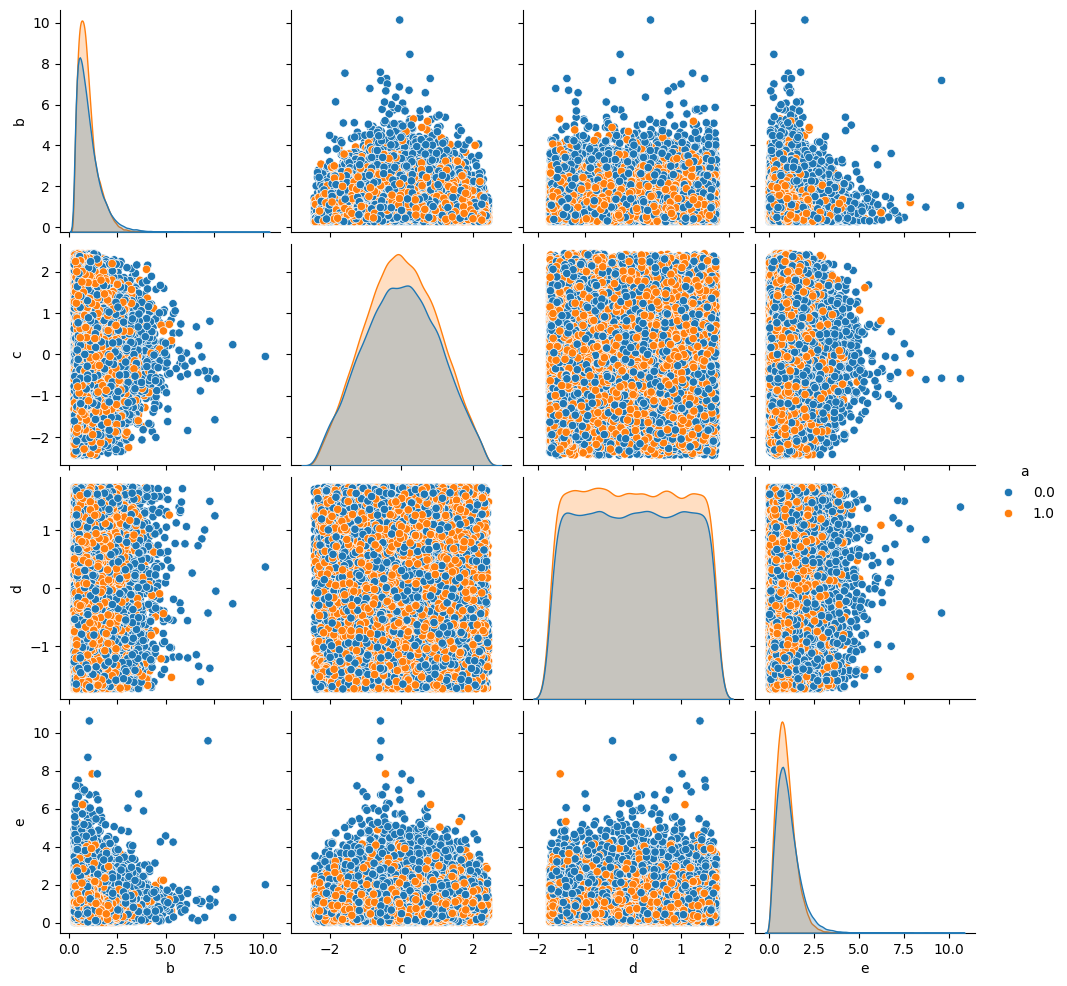

In [95]:
# Visualization the Distributions of Pairs of Columns
# to get a better grasp on what's in the data

sns.pairplot(df.iloc[:,0:5], hue="a")

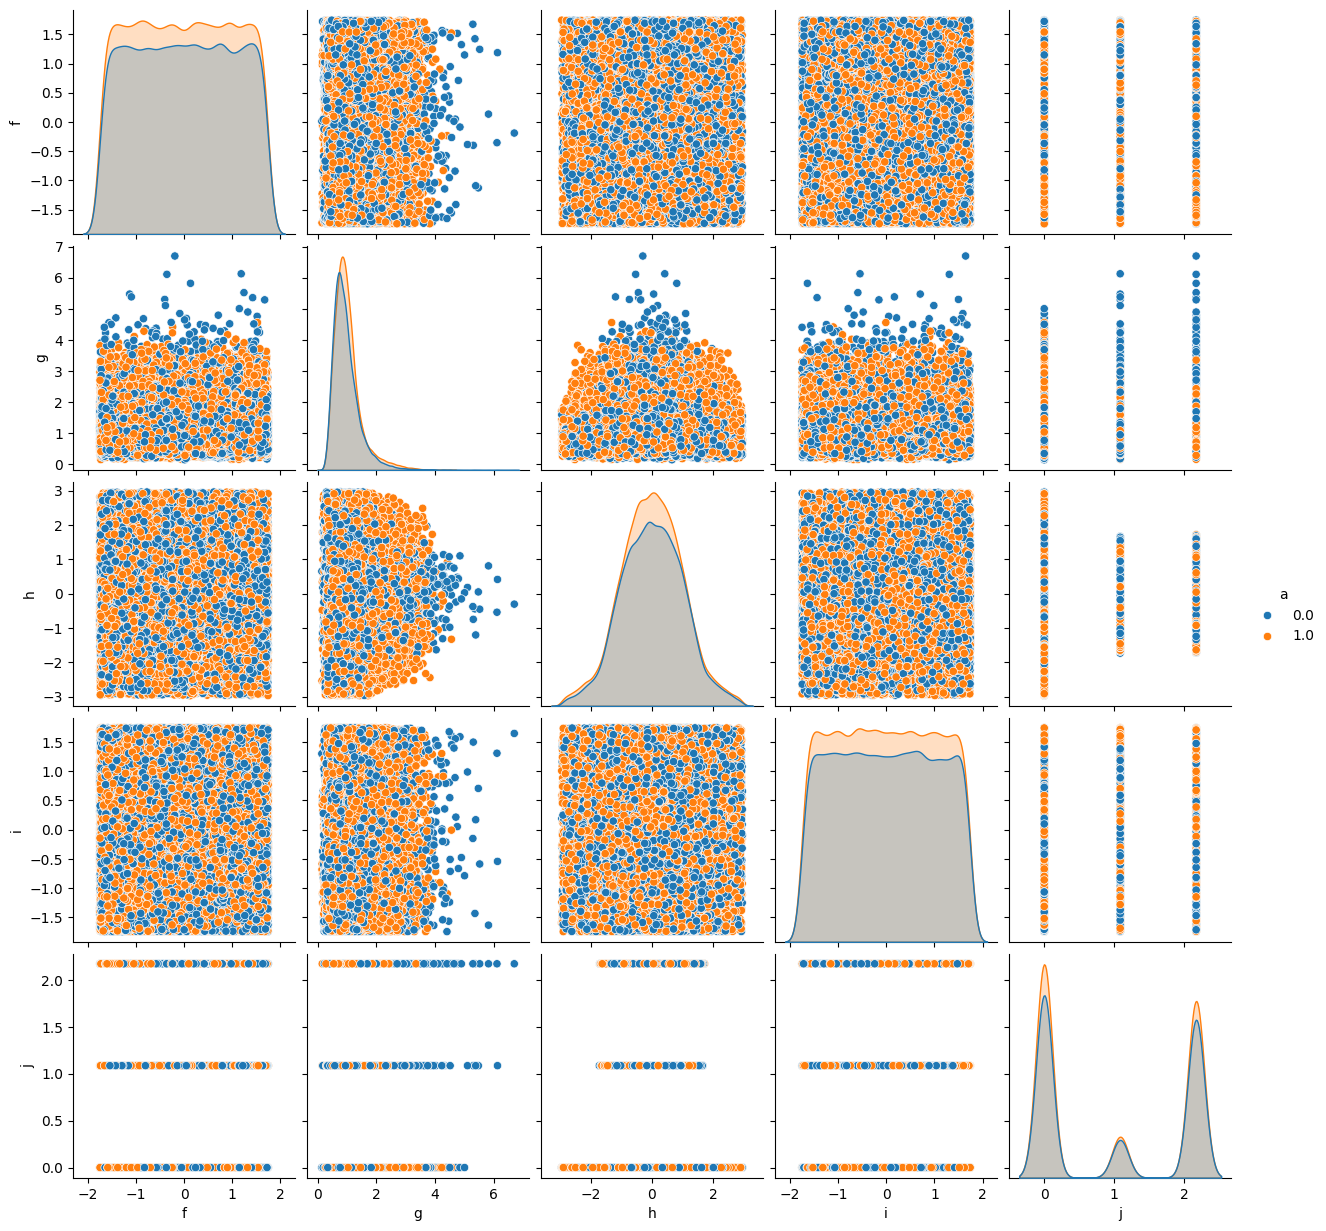

In [96]:
# Visualization the Distributions of Pairs of Columns
# to get a better grasp on what's in the data

sns.pairplot(df.iloc[:,[0,5,6,7,8,9]], hue="a")

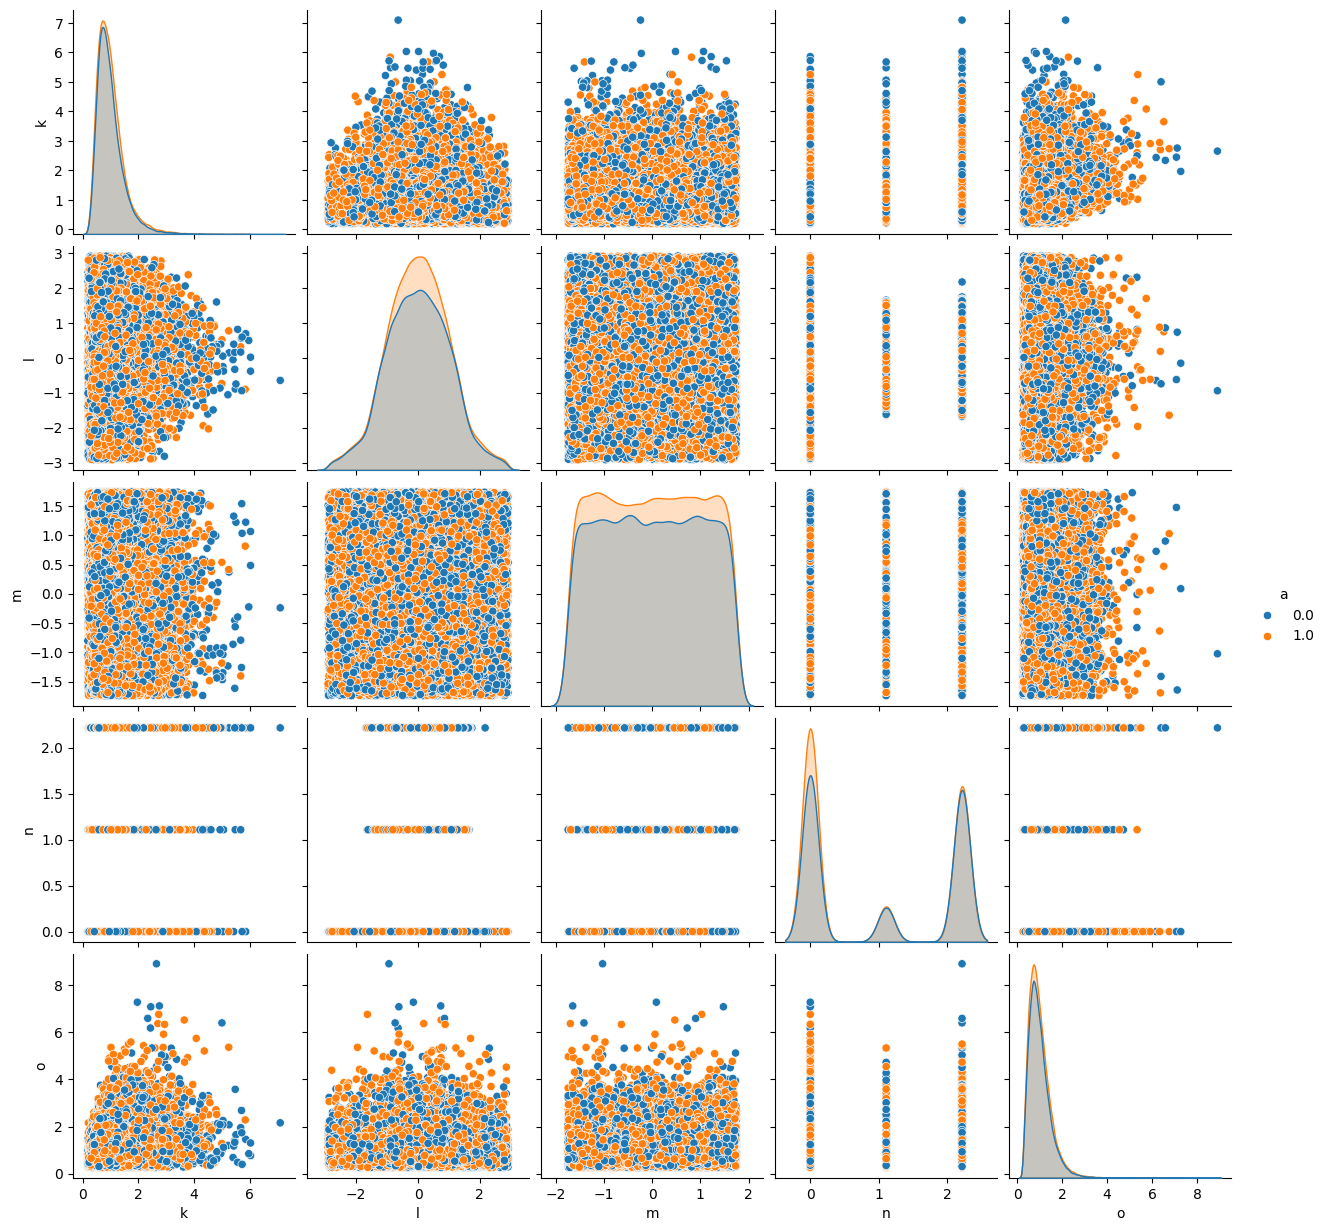

In [97]:
# Visualization the Distributions of Pairs of Columns
# to get a better grasp on what's in the data

sns.pairplot(df.iloc[:,[0,10,11,12,13,14]], hue="a")

# Data Preprocessing

In [44]:
# IQR

num_outliers_per_column = []

for column in df.columns:
    if column=="a":
        continue
        
    print(f"Column: {column}")
    Q1 = np.percentile(df[column], 25, interpolation = 'midpoint') 
    Q2 = np.percentile(df[column], 50, interpolation = 'midpoint') 
    Q3 = np.percentile(df[column], 75, interpolation = 'midpoint') 

    print(f"Q1 25 percentile of the given data is, {Q1}")
    print(f"Q1 50 percentile of the given data is, {Q2}")
    print(f"Q1 75 percentile of the given data is, {Q3}")

    IQR = Q3 - Q1 
    print(f"Interquartile range is {IQR}")
    
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print(f"low_limit is {low_lim}")
    print(f"up_limit is {up_lim}")
    
    outlier =[]
    for i in range(len(df[column])):
        if df[column][i]> up_lim:
            outlier.append(df[column][i])
            df.loc[i,column] = up_lim
                
                
        elif df[column][i]< low_lim:
            outlier.append(df[column][i])
            df.loc[i,column] = low_lim
                
    num_outliers_per_column.append(len(outlier))
    
    print(f"Number of Outliers in column {column} is {len(outlier)}")
    
    print("********************\n\n\n")


Column: b
Q1 25 percentile of the given data is, 0.5911193490028381
Q1 50 percentile of the given data is, 0.8564825654029846
Q1 75 percentile of the given data is, 1.23476243019104
Interquartile range is 0.6436430811882019
low_limit is -0.3743452727794647
up_limit is 2.200227051973343
Number of Outliers in column b is 3961
********************



Column: c
Q1 25 percentile of the given data is, -0.7383224964141845
Q1 50 percentile of the given data is, -0.0088198743760585
Q1 75 percentile of the given data is, 0.7382141947746276
Interquartile range is 1.476536691188812
low_limit is -2.9531275331974025
up_limit is 2.9530192315578456
Number of Outliers in column c is 0
********************



Column: d
Q1 25 percentile of the given data is, -0.8697113394737244
Q1 50 percentile of the given data is, -0.000241063782596
Q1 75 percentile of the given data is, 0.8726585507392883
Interquartile range is 1.7423698902130127
low_limit is -3.4832661747932434
up_limit is 3.4862133860588074
Number o

Number of Outliers in column y is 19617
********************



Column: z
Q1 25 percentile of the given data is, 0.7685132324695587
Q1 50 percentile of the given data is, 0.9165391623973846
Q1 75 percentile of the given data is, 1.1426329016685486
Interquartile range is 0.37411966919898987
low_limit is 0.2073337286710739
up_limit is 1.7038124054670334
Number of Outliers in column z is 5170
********************



Column: aa
Q1 25 percentile of the given data is, 0.673657238483429
Q1 50 percentile of the given data is, 0.8738222122192384
Q1 75 percentile of the given data is, 1.1425155401229858
Interquartile range is 0.4688583016395569
low_limit is -0.029630213975906372
up_limit is 1.8458029925823212
Number of Outliers in column aa is 6024
********************



Column: ab
Q1 25 percentile of the given data is, 0.8201756775379181
Q1 50 percentile of the given data is, 0.9478533267974854
Q1 75 percentile of the given data is, 1.1418176889419556
Interquartile range is 0.3216420114040375


In [45]:
np.array(num_outliers_per_column)

array([ 3961,     0,     0,  2916,     0,  4990,   582,     0,     0,
        4044,   481,     0,     0,  3162,     0,     0,     0,  3414,
           0,     0,     0, 14010,  7504, 19617,  5170,  6024,  6237,
        5996])

In [46]:
# MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

for column in df.columns:
    if column=="a":
        continue
    scaler = MinMaxScaler()
    df[column] = scaler.fit_transform(np.array(df[column]).reshape(-1,1))

df.head()

,a,b,c,d,e,f,g,h,i,j,...,t,u,v,w,x,y,z,aa,ab,ac
0,1.0,0.672052,0.630526,0.548565,0.173033,0.659558,0.647756,0.892500,0.693419,0.0,...,0.292764,0.269014,0.0,0.451553,0.512206,0.399412,0.594369,0.252758,0.436900,0.567990
1,0.0,0.260704,0.230246,0.675272,0.407991,0.329004,0.583884,0.688214,0.082296,1.0,...,0.244748,0.490912,0.0,0.494617,1.000000,0.907769,1.000000,1.000000,1.000000,1.000000
2,1.0,0.240935,0.299060,0.618764,0.125283,0.095859,0.198367,0.123571,0.278724,0.0,...,0.364121,0.840820,0.5,0.344493,0.606762,0.370660,0.307856,0.180299,0.385117,0.336222
3,0.0,0.678040,0.500700,0.900194,1.000000,0.983702,0.937361,0.383929,0.389515,1.0,...,0.558853,0.442999,0.0,0.297560,0.452461,0.455380,1.000000,0.994089,1.000000,0.972969
4,1.0,1.000000,0.256851,0.267423,0.084366,0.532294,0.996664,0.167321,0.867721,0.0,...,0.024508,0.558593,0.0,0.458507,0.385638,0.383061,0.330027,0.254125,0.260205,0.244758


In [47]:
df.describe()

,a,b,c,d,e,f,g,h,i,j,...,t,u,v,w,x,y,z,aa,ab,ac
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.527450,0.362329,0.499551,0.500187,0.414321,0.499779,0.466922,0.500459,0.498323,0.46229,...,0.499888,0.500679,0.321530,0.518243,0.517786,0.532493,0.513504,0.490118,0.519495,0.494171
std,0.499248,0.257464,0.207109,0.288357,0.228625,0.288949,0.220739,0.182261,0.288592,0.47353,...,0.201379,0.288683,0.451016,0.252622,0.219187,0.253845,0.204629,0.229996,0.211045,0.217032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.164330,0.348470,0.250390,0.243415,0.249580,0.305391,0.375000,0.248958,0.00000,...,0.356619,0.250550,0.000000,0.375005,0.375003,0.375000,0.367230,0.340539,0.375001,0.341413
50%,1.000000,0.302143,0.498300,0.499826,0.376243,0.499911,0.428047,0.500268,0.496643,0.50000,...,0.500167,0.500652,0.000000,0.486176,0.484231,0.402798,0.467374,0.453153,0.474239,0.434279
75%,1.000000,0.498598,0.651730,0.750246,0.546046,0.749589,0.583222,0.625000,0.746904,1.00000,...,0.642548,0.750883,1.000000,0.625000,0.625000,0.624994,0.620336,0.604321,0.625000,0.604842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection with ANOVA Test

In [48]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=15)
selector.fit(df.iloc[:,1:], df.iloc[:,0])

selector.scores_

array([1.20593079e+02, 1.69355260e+00, 2.34039604e+00, 8.69960897e+02,
       1.05090826e+00, 2.80044756e+02, 3.33901546e+00, 1.58607349e-01,
       1.17261654e+01, 2.44141867e+01, 1.64293152e+00, 1.91546535e-01,
       2.83127563e+02, 6.54948424e+00, 3.69340274e-02, 1.42455142e-02,
       5.42766751e+01, 1.53061832e+02, 1.24297000e+00, 1.03478903e-01,
       3.13153690e+01, 2.16924745e+01, 8.79197394e+01, 2.47692022e+01,
       1.97005082e+01, 2.04828371e+03, 5.38011802e+02, 2.13760866e+03])

In [49]:
cols = selector.get_support(indices=True)
df.columns[cols]

Index(['a', 'd', 'f', 'j', 'm', 'q', 'r', 'u', 'v', 'w', 'x', 'y', 'z', 'aa',
       'ab'],
      dtype='object')

In [50]:
df = df.iloc[:,cols]
df.head()

,a,d,f,j,m,q,r,u,v,w,x,y,z,aa,ab
0,1.0,0.548565,0.659558,0.0,0.215689,0.972621,1.0,0.269014,0.0,0.451553,0.512206,0.399412,0.594369,0.252758,0.436900
1,0.0,0.675272,0.329004,1.0,0.744197,0.280953,0.0,0.490912,0.0,0.494617,1.000000,0.907769,1.000000,1.000000,1.000000
2,1.0,0.618764,0.095859,0.0,0.972143,0.416416,0.0,0.840820,0.5,0.344493,0.606762,0.370660,0.307856,0.180299,0.385117
3,0.0,0.900194,0.983702,1.0,0.525962,0.773327,0.5,0.442999,0.0,0.297560,0.452461,0.455380,1.000000,0.994089,1.000000
4,1.0,0.267423,0.532294,0.0,0.286206,0.452868,1.0,0.558593,0.0,0.458507,0.385638,0.383061,0.330027,0.254125,0.260205


# Modeling and Evaluation

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=.3)

In [53]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [151]:
model_params = {
    "knn": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": range(3,12)
        }
    },
    "svm": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'rbf']
        }
    },
    "mlp": {
        "model": MLPClassifier(),
        "params": {
            "hidden_layer_sizes": [(50,), (100,)],
            "activation": ["relu", "tanh"]
        }
    },
    "XGBoost": {
        "model": GradientBoostingClassifier(),
        "params": {
            "loss":['log_loss']
        }
    }
}

In [152]:
scores = []

for model, mp in model_params.items():
    if model != "XGBoost":
        continue
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(df.iloc[:,1:], df.iloc[:,0])
    scores.append({
        "model": model,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })
    print(model)

XGBoost


In [189]:
#res = pd.DataFrame(scores, columns=["model", "best_score", "best_params"]).copy()
res

,model,best_score,best_params
0,knn,0.60945,{'n_neighbors': 11}
1,svm,0.66043,"{'C': 10, 'kernel': 'rbf'}"
2,mlp,0.68130,"{'activation': 'relu', 'hidden_layer_sizes': (..."
3,XGBoost,0.67677,


In [196]:
res.iloc[2,2]["hidden_layer_sizes"]

(100,)

In [190]:
# MLP with relu activation function and hidden layer size of 100 seems to have a better score, thus, it will be utilized from now on

In [197]:
model = MLPClassifier(activation=res.iloc[2,2]["activation"],
                      hidden_layer_sizes=res.iloc[2,2]["hidden_layer_sizes"])

model.fit(X_train, y_train)

MLPClassifier()

In [203]:
result = model.predict(X_test)

In [206]:
# Accuracy Rate
(np.array(y_test) == result).sum() / len(result)

0.6802333333333334

In [54]:
model = MLPClassifier(activation="relu",
                      hidden_layer_sizes=100)

model.fit(X_train, y_train)

/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=100)

In [55]:
result = model.predict(X_test)

# Evaluating the Model with Metrics

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, confusion_matrix, roc_auc_score, roc_curve

In [57]:
# Accuracy Score

accuracy_score(y_test, result)

0.6766666666666666

In [58]:
# Precision Score

precision_score(y_test, result)

0.6849474199070678

In [59]:
# Recall Score

recall_score(y_test, result)

0.7113015873015873

In [60]:
# F1 Score
f1_score(y_test, result)

0.69787578645736

In [61]:
# Confusion Matrix

confusion_matrix(y_test, result)

array([[ 9097,  5153],
       [ 4547, 11203]])

In [62]:
# ROC-AUC Score

roc_auc_score(y_test, result)

0.674843776106934

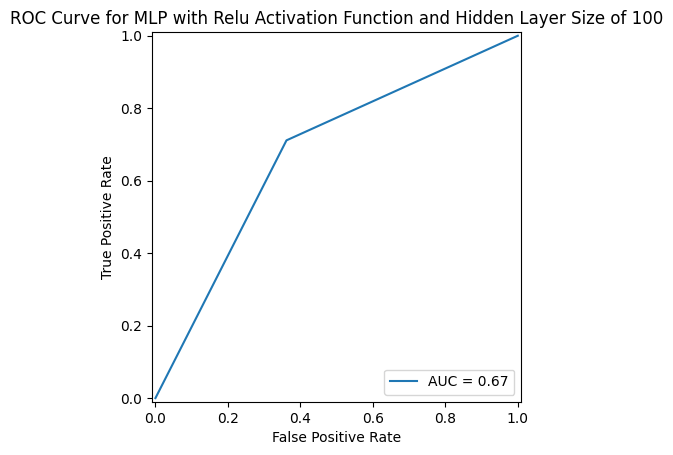

In [63]:
from sklearn.metrics import RocCurveDisplay, auc

fpr, tpr, threshold = roc_curve(y_test, result)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.title("ROC Curve for MLP with Relu Activation Function and Hidden Layer Size of 100")

plt.show()